# A1 - Data Curation
## DATA 512 - Autumn 2021

Purpose: The goal of this assignment is to construct, analyze, and publish a dataset of monthly traffic
on English Wikipedia from January 1 2008 through August 30 2021.

### Setup

We import the necessary packages for the Data Acquisition step.

In [1]:
import json
import requests
import pandas as pd

### Data Acquisition

There are two endpoint APIs we will need to access for this assignment - Legacy Pagecounts API and Pageviews API

Legacy Pagecounts API

Provides access to desktop and mobile traffic data from December 2007 through July 2016

Pageviews API

Provides access to desktop, mobile web, and mobile app traffic data from July 2015 through the most recent month (at the time of this assignment, September 2021)

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# Parameters for each API call

params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

headers = {
    'User-Agent': 'https://github.com/laurathriftwood',
    'From': 'lwood3@uw.edu'
}

We have a number of helper functions below that serve various purposes:
- api_call() will be used to make our API calls and returns a dictionary object containing the results of the call
- write_json() will be used to write the raw results of each of the API calls to a JSON file for our records

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    return response

In [5]:
def write_json(output, file_name):
    print(file_name)
    with open(file_name, 'w+') as outfile:
        json.dump(output, outfile)
        print(" written successfully")

We will need to make 5 separate API calls to retrieve our data for all months where data is available.

Legacy PageCounts API calls

1. desktop traffic December 2007 through July 2016
2. mobile traffic December 2007 through July 2016

Pageviews API calls

3. deskop traffic July 2015 through September 2021
4. mobile web traffic July 2015 through September 2021
5. mobile app traffic July 2015 through September 2021

In [6]:
# Legacy PageCounts API calls

# desktop traffic
monthly_legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)

# mobile traffic
monthly_legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)

# PageViews API calls

# desktop traffic
monthly_pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)

# mobile-web traffic
monthly_pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

# mobile-app traffic
monthly_pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

Next, we write a copy of the results of each of our API calls to the directory. 

In [7]:
# Write Legacy PageCounts to file
write_json(monthly_legacy_desktop, 'pagecounts_desktop_200801-201607.json')
write_json(monthly_legacy_mobile, 'pagecounts_mobile_200801-201607.json')
# Write PageViews to file
write_json(monthly_pageviews_desktop, 'pageviews_desktop_201507-202109.json')
write_json(monthly_pageviews_mobile_web, 'pageviews_mobile-web_201507-202109.json')
write_json(monthly_pageviews_mobile_app, 'pageviews_mobile-app_201507-202109.json')

pagecounts_desktop_200801-201607.json
 written successfully
pagecounts_mobile_200801-201607.json
 written successfully
pageviews_desktop_201507-202109.json
 written successfully
pageviews_mobile-web_201507-202109.json
 written successfully
pageviews_mobile-app_201507-202109.json
 written successfully


In [8]:
#read in Legacy data from json files
df_monthly_legacy_desktop = pd.read_json('pagecounts_desktop_200801-201607.json')
df_monthly_legacy_mobile = pd.read_json('pagecounts_mobile_200801-201607.json')

#read in PageViews data from json files
df_monthly_pageviews_desktop = pd.read_json('pageviews_desktop_201507-202109.json')
df_monthly_pageviews_mobile_web = pd.read_json('pageviews_mobile-web_201507-202109.json')
df_monthly_pageviews_mobile_app = pd.read_json('pageviews_mobile-app_201507-202109.json')

In [9]:
#unnest Legacy data into dataframe
df_monthly_legacy_desktop = pd.json_normalize(df_monthly_legacy_desktop['items'])
df_monthly_legacy_mobile = pd.json_normalize(df_monthly_legacy_mobile['items'])

#unnest PageViews data into dataframe
df_monthly_pageviews_desktop = pd.json_normalize(df_monthly_pageviews_desktop['items'])
df_monthly_pageviews_mobile_web = pd.json_normalize(df_monthly_pageviews_mobile_web['items'])
df_monthly_pageviews_mobile_app = pd.json_normalize(df_monthly_pageviews_mobile_app['items'])

### Data Cleaning and Processing

In [10]:
#drop unnecessary columns from Legacy data
legacy_columns = ['project', 'granularity']

df_monthly_legacy_desktop = df_monthly_legacy_desktop.drop(columns = legacy_columns, axis=1)
df_monthly_legacy_mobile = df_monthly_legacy_mobile.drop(columns = legacy_columns, axis=1)

#rename legacy headers
df_monthly_legacy_desktop = df_monthly_legacy_desktop.rename(columns={'access-site': 'access', 'count': 'num_views'})
df_monthly_legacy_mobile = df_monthly_legacy_mobile.rename(columns={'access-site': 'access', 'count': 'num_views'})

In [11]:
df_monthly_legacy_desktop

,access,timestamp,num_views
0,desktop-site,2008010100,4930902570
1,desktop-site,2008020100,4818393763
2,desktop-site,2008030100,4955405809
3,desktop-site,2008040100,5159162183
4,desktop-site,2008050100,5584691092
...,...,...,...
98,desktop-site,2016030100,5407676056
99,desktop-site,2016040100,5572235399
100,desktop-site,2016050100,5330532334
101,desktop-site,2016060100,4975092447


In [12]:
#rename access for legacy desktop views
df_monthly_legacy_desktop = df_monthly_legacy_desktop.replace(to_replace = ['desktop-site'], value = 'pagecount_desktop_views')
#rename access for legacy mobile views
df_monthly_legacy_mobile = df_monthly_legacy_mobile.replace(to_replace = ['mobile-site'], value = 'pagecount_mobile_views')
#rename access for pageviews desktop
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.replace(to_replace = ['desktop'], value = 'pageview_desktop_views')
#rename column header
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.rename(columns={'views': 'num_views'})
#drop unnecessary columns from desktop PageViews
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.drop(df_monthly_pageviews_desktop.columns[[0, 2, 3]], axis=1)

For data collected from the Pageviews API, we want to combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month. We start by merging the two tables.

In [13]:
#merge the two PageViews mobile using inner join
merged = pd.merge(left=df_monthly_pageviews_mobile_web, 
                       right=df_monthly_pageviews_mobile_app,
                       left_on='timestamp', 
                       right_on='timestamp')

#sum the views for the two mobile access types
merged['num_views'] = merged['views_x'] + merged['views_y']
#add a column for access type for combined views
merged['access'] = 'pageview_mobile_views'

In [14]:
df_monthly_pageviews_mobile_combined = merged.copy()

In [15]:
#drop unnecessary columns from combined mobile PageViews
df_monthly_pageviews_mobile_combined = df_monthly_pageviews_mobile_combined.drop(df_monthly_pageviews_mobile_combined.columns[[0, 1, 2, 3, 5, 6, 7, 8, 9, 10]], 
                                                                                 axis=1)

In [16]:
#combine all dataframes
all_data = [df_monthly_legacy_desktop, 
            df_monthly_legacy_mobile, 
            df_monthly_pageviews_desktop, 
            df_monthly_pageviews_mobile_combined]

all_data_concat = pd.concat(all_data, axis=0, ignore_index = True, keys=['pagecount_desktop_views', 
                                                    'pagecount_mobile_views', 
                                                   'pageview_desktop_views', 
                                                   'pageview_mobile_views'])

In [17]:
#pull view_counts for each access type into columns 
all_data_concat['pagecount_desktop_views'] = all_data_concat.loc[all_data_concat['access'] == 'pagecount_desktop_views', 'num_views']
all_data_concat['pagecount_mobile_views'] = all_data_concat.loc[all_data_concat['access'] == 'pagecount_mobile_views', 'num_views']
all_data_concat['pageview_desktop_views'] = all_data_concat.loc[all_data_concat['access'] == 'pageview_desktop_views', 'num_views']
all_data_concat['pageview_mobile_views'] = all_data_concat.loc[all_data_concat['access'] == 'pageview_mobile_views', 'num_views']

#replace null values with 0
all_data_concat = all_data_concat.fillna(0)

#drop access and num_views columns
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0, 2]], axis = 1)

#convert to int
all_data_concat = all_data_concat.astype(int)

In [18]:
all_data_concat

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2008010100,4930902570,0,0,0
1,2008020100,4818393763,0,0,0
2,2008030100,4955405809,0,0,0
3,2008040100,5159162183,0,0,0
4,2008050100,5584691092,0,0,0
...,...,...,...,...,...
270,2021050100,0,0,0,4976579558
271,2021060100,0,0,0,4584510417
272,2021070100,0,0,0,4778909421
273,2021080100,0,0,0,4732194000


Now we group by timestamp for the overlapping period of time captured by both APIs. Then we extract the month (MM) and year (YYYY) from the timestamps into their own columns, drop the timestamp column, reorder the columns, and output our final file.

In [19]:
#create a copy to export
all_data_concat_export = all_data_concat.copy()

all_data_concat = all_data_concat.groupby(['timestamp']).sum().reset_index()

# extract year and month from timestamp
all_data_concat['timestamp'] = all_data_concat['timestamp'].astype(str)
all_data_concat['year'] = all_data_concat['timestamp'].str[0:4]
all_data_concat['month'] = all_data_concat['timestamp'].str[4:6]

#add all view columns that sums Legacy Page
all_data_concat['pagecount_all_views'] = all_data_concat['pagecount_desktop_views'] + all_data_concat['pagecount_mobile_views']
all_data_concat['pageview_all_views'] = all_data_concat['pageview_desktop_views'] + all_data_concat['pageview_mobile_views']

#create a copy to export
all_data_concat_export = all_data_concat.copy()

#drop timestamp column
all_data_concat_export = all_data_concat_export.drop(all_data_concat.columns[[0]], axis=1)

#reorder columns
all_data_concat_export = all_data_concat_export[['year', 'month', 'pagecount_all_views', 
                                   'pagecount_desktop_views', 'pagecount_mobile_views', 
                                   'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']]

#output to file
all_data_concat_export.to_csv(r'en-wikipedia_traffic_200712-202108.csv', index = False, header = True)

In [20]:
all_data_concat

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,year,month,pagecount_all_views,pageview_all_views
0,2008010100,4930902570,0,0,0,2008,01,4930902570,0
1,2008020100,4818393763,0,0,0,2008,02,4818393763,0
2,2008030100,4955405809,0,0,0,2008,03,4955405809,0
3,2008040100,5159162183,0,0,0,2008,04,5159162183,0
4,2008050100,5584691092,0,0,0,2008,05,5584691092,0
...,...,...,...,...,...,...,...,...,...
160,2021050100,0,0,2824416177,4976579558,2021,05,0,7800995735
161,2021060100,0,0,2505971366,4584510417,2021,06,0,7090481783
162,2021070100,0,0,2765584368,4778909421,2021,07,0,7544493789
163,2021080100,0,0,2763413934,4732194000,2021,08,0,7495607934


# Data Visualization

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<ipython-input-22-f500c2c2b573>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_data_concat['timestamp'])


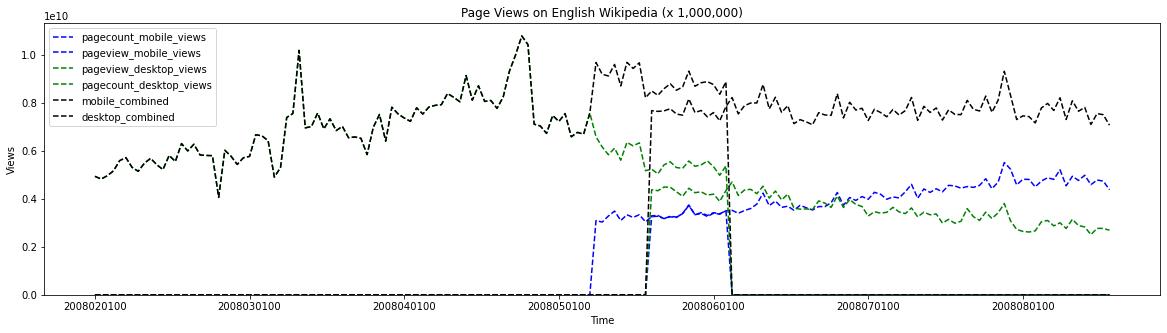

In [22]:
x = all_data_concat['timestamp']

y1 = all_data_concat['pagecount_mobile_views']
y2 = all_data_concat['pageview_mobile_views']
y3 = all_data_concat['pageview_desktop_views']
y4 = all_data_concat['pagecount_desktop_views']
y5 = all_data_concat['pagecount_all_views']
y6 = all_data_concat['pageview_all_views']

fig, ax = plt.subplots()

line1 = ax.plot(y1, '--', color = 'blue', label='pagecount_mobile_views')
line2 = ax.plot(y2, '--', color = 'blue', label='pageview_mobile_views')
line3 = ax.plot(y3, '--', color = 'green', label='pageview_desktop_views')
line4 = ax.plot(y4, '--', color = 'green', label='pagecount_desktop_views')
line5 = ax.plot(y5, '--', color = 'black', label='mobile_combined')
line6 = ax.plot(y6, '--', color = 'black', label='desktop_combined')

fig.set_figheight(5)
fig.set_figwidth(20)

plt.title('Page Views on English Wikipedia (x 1,000,000)', fontsize=12)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Views')
ax.set_xticklabels(all_data_concat['timestamp'])
ax.legend()

Save the figure generated above.

In [23]:
fig.savefig('Wikipedia_Visualization.png')